In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../imports/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


## Panel H <br>
Data requirements: Patient HLA mutation status, MAF file

In [2]:
hla_df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/clinical/mutated_hla.csv', index_col=0)
hla_df.index = hla_df['Sample']

In [6]:
hla_df

,Sample,mutated_hla
Sample,,
TCGA-02-0003,TCGA-02-0003,False
TCGA-02-0033,TCGA-02-0033,False
TCGA-02-0047,TCGA-02-0047,False
TCGA-02-0055,TCGA-02-0055,False
TCGA-02-2466,TCGA-02-2466,False
TCGA-02-2470,TCGA-02-2470,False
TCGA-02-2483,TCGA-02-2483,False
TCGA-02-2485,TCGA-02-2485,False
TCGA-02-2486,TCGA-02-2486,False


In [3]:
mutations_df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/tcga_mutation_file.csv', index_col=0)
mutations_df = mutations_df.drop_duplicates(['Barcode', 'Hugo_Symbol', 'Protein_position'])
mutations_df = mutations_df[mutations_df.Barcode.isin(hla_df['Sample'])]

In [7]:
mutations_df

,Tumor_Sample_Barcode,Hugo_Symbol,Variant_Classification,Protein_position,Amino_acids,Chromosome,Start_Position,Strand,Reference_Allele,Tumor_Seq_Allele2,Transcript_ID,Barcode
0,TCGA-FX-A3NJ-01A-11D-A21Q-09,INTS3,Missense_Mutation,500/1042,P/R,chr1,153761659,+,C,G,ENST00000318967,TCGA-FX-A3NJ
3,TCGA-FX-A3NJ-01A-11D-A21Q-09,PLD5,Missense_Mutation,536/536,V/L,chr1,242089859,+,C,G,ENST00000442594,TCGA-FX-A3NJ
7,TCGA-FX-A3NJ-01A-11D-A21Q-09,GC,Missense_Mutation,406/474,L/R,chr4,71754456,+,A,C,ENST00000273951,TCGA-FX-A3NJ
9,TCGA-FX-A3NJ-01A-11D-A21Q-09,PSMG4,Missense_Mutation,65/123,T/A,chr6,3263702,+,A,G,ENST00000438998,TCGA-FX-A3NJ
10,TCGA-FX-A3NJ-01A-11D-A21Q-09,BCLAF1,Missense_Mutation,307/920,P/S,chr6,136277962,+,G,A,ENST00000531224,TCGA-FX-A3NJ
15,TCGA-FX-A3NJ-01A-11D-A21Q-09,ACADSB,Missense_Mutation,138/432,F/V,chr10,123040574,+,T,G,ENST00000358776,TCGA-FX-A3NJ
17,TCGA-FX-A3NJ-01A-11D-A21Q-09,TAF6L,Missense_Mutation,2/622,S/L,chr11,62775788,+,C,T,ENST00000294168,TCGA-FX-A3NJ
18,TCGA-FX-A3NJ-01A-11D-A21Q-09,CRY1,Missense_Mutation,227/586,R/S,chr12,107001283,+,T,A,ENST00000008527,TCGA-FX-A3NJ
21,TCGA-FX-A3NJ-01A-11D-A21Q-09,IL17RA,Missense_Mutation,792/866,S/Y,chr22,17109594,+,C,A,ENST00000319363,TCGA-FX-A3NJ
144,TCGA-DX-A1KU-01A-32D-A24N-09,TTC39A,Missense_Mutation,28/613,C/S,chr1,51321787,+,C,G,ENST00000447632,TCGA-DX-A1KU


In [4]:
tissues_df = pd.read_csv('/cellar/users/ramarty/Data/hla/git_data/data/patient_tissues.csv', index_col=0)

In [5]:
df = pd.merge(tissues_df, pd.merge(pd.DataFrame(mutations_df.Barcode.value_counts()), hla_df, left_index=True, right_index=True),
                          left_index=True, right_index=True)
df.columns = ['Tissue', 'number_of_mutations', 'Sample', 'mutated_hla']

In [8]:
tissues = list(df[df.mutated_hla == 1].Tissue.value_counts().index)[:10]

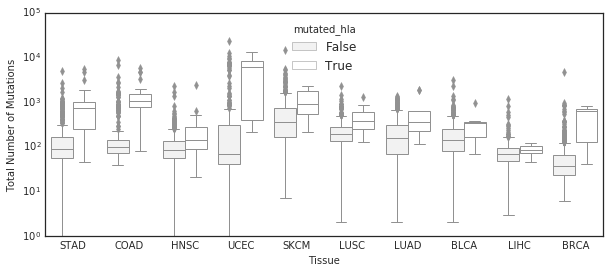

In [9]:
plt.rcParams['figure.figsize']=(10,4)
ax = sns.boxplot(x='Tissue', y='number_of_mutations', hue='mutated_hla', order=tissues, data=df, 
                 color='white')
ax.set_yscale("log")
plt.ylabel('Total Number of Mutations')

In [ ]:
# p-values